# Does the Species Exist in a Given Model

This ipynb serves as a starting point of RMG Question-Answering System by answering the question of `does the species exist in a given model?`.

- Input: 
    - mechanism with chem.inp and species_dictionary.txt
    
    - species of your interest
- Output:
    - yes or no
    
    - the reactions associated with the species if yes, none if no.

In [1]:
from utilities.wikiMagics import JinjaMagics
from IPython.core.magic import register_cell_magic
ip = get_ipython()
ip.register_magics(JinjaMagics)

In [2]:
# load model into memory
import os
import re
from rmgpy.chemkin import loadChemkinFile
from rmgpy.molecule.molecule import Molecule
from rmgpy.molecule.draw import MoleculeDrawer

mech = 'PDD_DEDS_merge_add17'
path = os.path.abspath('./')
chemkinPath= path + '/data/' + mech + '/chem.inp'
dictionaryPath = path + '/data/' + mech + '/species_dictionary.txt'
species_list, reactions_list = loadChemkinFile(chemkinPath, dictionaryPath, readComments = False)

#generate species images
mech_path = path + '/data/' + mech
speciesPath = mech_path + '/species/'
if not os.path.isdir(speciesPath):
    os.makedirs(speciesPath)

species = species_list[:]
re_index_search = re.compile(r'\((\d+)\)$').search
for spec in species:
    match = re_index_search(spec.label)
    if match:
        spec.index = int(match.group(0)[1:-1])
        spec.label = spec.label[0:match.start()]
    # Draw molecules if necessary
    fstr = os.path.join(mech_path, 'species', '{0}.png'.format(spec))
    if not os.path.exists(fstr):
        try:
            MoleculeDrawer().draw(spec.molecule[0], 'png', fstr)
        except IndexError:
            raise OutputError("{0} species could not be drawn!".format(getSpeciesIdentifier(spec)))

## Search for a species

### first situation: when you know structure (e.g., SMILES) of the species

In [3]:
species_target = 'C=CCC[CH]CCCCCC'

In [4]:
# search the target species in model
mol_tgt = Molecule().fromSMILES(species_target)

for spc in species_list:
    if spc.isIsomorphic(mol_tgt):
        print '{} is found in model with spc name {}'.format(mol_tgt, spc)

<Molecule "C=CCC[CH]CCCCCC"> is found in model with spc name HKH12(339)


### second situation: when you know the label/index of species

In [5]:
target_spc_index = 34
target_spc_label = 'C8H8'

The spcies with index 34 is found and displayed below:


And its SMILES is CC=S.
The spcies with label C8H8 is found and displayed below:


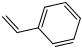

And its SMILES is C=CC1C=CC=CC=1.


In [6]:
from IPython.display import display as disp
for spc in species_list:
    if spc.index == target_spc_index:
        print "The spcies with index {} is found and displayed below:".format(target_spc_index)
        disp(spc)
        print "And its SMILES is {}.".format(spc.molecule[0].toSMILES())
        break
else:
    print "Cound not find species with index {}.".format(target_spc_index)

for spc in species_list:
    if spc.label == target_spc_label:
        print "The spcies with label {} is found and displayed below:".format(target_spc_label)
        disp(spc)
        print "And its SMILES is {}.".format(spc.molecule[0].toSMILES())
        break
else:
    print "Cound not find species with label {}.".format(target_spc_label)

## Search for reactions of a species

In [7]:
rxns_spc = []
for rxn in reactions_list:
    for spec_rxn in (rxn.reactants + rxn.products):
        if spec_rxn.index == spc.index:
            rxns_spc.append(rxn)

disp_num = min(10, len(rxns_spc))

In [8]:
%%jinja html
rxn_with_spc.html

Next steps:

- accept target species input in more types, e.g., chemical name, InChI